In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [3]:
df = pd.read_csv('Car_sales.csv')
df.replace('.', np.nan, inplace=True)
df = df.dropna()
print(df.shape)
df.head()

(117, 15)


,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,8-Sep-15


In [4]:
df['Passenger'] = (df['Vehicle type']=='Passenger')
df.drop('Vehicle type', inplace=True, axis=1)

for i in df.columns[2:-2]:
    df[i] = pd.to_numeric(df[i])

In [5]:
df['Latest Launch'] = pd.to_datetime(df['Latest Launch'])
df['Latest Launch'] = (df['Latest Launch'] - pd.Timestamp(1970, 1, 1)).astype(str)
for i in df.index:
    df.loc[i, 'Latest Launch'] = float(df.loc[i, 'Latest Launch'].split()[0])

In [6]:
for i in df['Manufacturer'].unique()[:-1]:
    df[i] = (df['Manufacturer'] == i)
df.head(10)

,Manufacturer,Model,Sales in thousands,4-year resale value,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,...,Mitsubishi,Mercury,Mercedes-Benz,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Saturn,Toyota
0,Acura,Integra,16.919,16.360,21.500,1.8,140,101.2,67.3,172.4,...,False,False,False,False,False,False,False,False,False,False
1,Acura,TL,39.384,19.875,28.400,3.2,225,108.1,70.3,192.9,...,False,False,False,False,False,False,False,False,False,False
3,Acura,RL,8.588,29.725,42.000,3.5,210,114.6,71.4,196.6,...,False,False,False,False,False,False,False,False,False,False
4,Audi,A4,20.397,22.255,23.990,1.8,150,102.6,68.2,178.0,...,False,False,False,False,False,False,False,False,False,False
5,Audi,A6,18.780,23.555,33.950,2.8,200,108.7,76.1,192.0,...,False,False,False,False,False,False,False,False,False,False
6,Audi,A8,1.380,39.000,62.000,4.2,310,113.0,74.0,198.2,...,False,False,False,False,False,False,False,False,False,False
8,BMW,328i,9.231,28.675,33.400,2.8,193,107.3,68.5,176.0,...,False,False,False,False,False,False,False,False,False,False
9,BMW,528i,17.527,36.125,38.900,2.8,193,111.4,70.9,188.0,...,False,False,False,False,False,False,False,False,False,False
10,Buick,Century,91.561,12.475,21.975,3.1,175,109.0,72.7,194.6,...,False,False,False,False,False,False,False,False,False,False
11,Buick,Regal,39.350,13.740,25.300,3.8,240,109.0,72.7,196.2,...,False,False,False,False,False,False,False,False,False,False


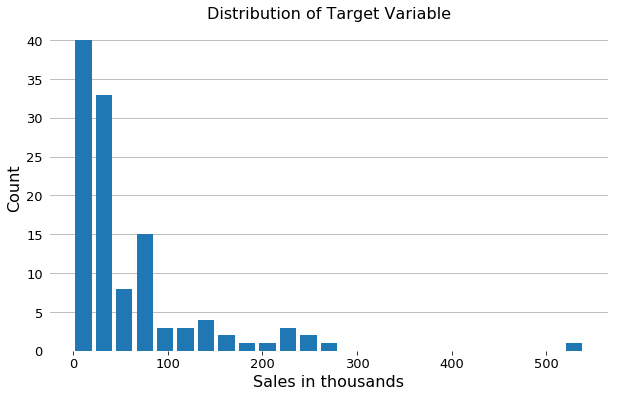

In [7]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.set_axisbelow(True)
plt.hist(df['Sales in thousands'], bins=25, rwidth=0.8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(left=False)
ax.set_xlabel('Sales in thousands', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Distribution of Target Variable', fontsize=16)
plt.grid(axis='y')
plt.show()

In [8]:
df = df[df['Sales in thousands'] <= 300]
df.drop(['4-year resale value', 'Latest Launch'], axis=1, inplace=True)
df.shape

(116, 38)

In [9]:
df.head(10)

,Manufacturer,Model,Sales in thousands,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,...,Mitsubishi,Mercury,Mercedes-Benz,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Saturn,Toyota
0,Acura,Integra,16.919,21.500,1.8,140,101.2,67.3,172.4,2.639,...,False,False,False,False,False,False,False,False,False,False
1,Acura,TL,39.384,28.400,3.2,225,108.1,70.3,192.9,3.517,...,False,False,False,False,False,False,False,False,False,False
3,Acura,RL,8.588,42.000,3.5,210,114.6,71.4,196.6,3.850,...,False,False,False,False,False,False,False,False,False,False
4,Audi,A4,20.397,23.990,1.8,150,102.6,68.2,178.0,2.998,...,False,False,False,False,False,False,False,False,False,False
5,Audi,A6,18.780,33.950,2.8,200,108.7,76.1,192.0,3.561,...,False,False,False,False,False,False,False,False,False,False
6,Audi,A8,1.380,62.000,4.2,310,113.0,74.0,198.2,3.902,...,False,False,False,False,False,False,False,False,False,False
8,BMW,328i,9.231,33.400,2.8,193,107.3,68.5,176.0,3.197,...,False,False,False,False,False,False,False,False,False,False
9,BMW,528i,17.527,38.900,2.8,193,111.4,70.9,188.0,3.472,...,False,False,False,False,False,False,False,False,False,False
10,Buick,Century,91.561,21.975,3.1,175,109.0,72.7,194.6,3.368,...,False,False,False,False,False,False,False,False,False,False
11,Buick,Regal,39.350,25.300,3.8,240,109.0,72.7,196.2,3.543,...,False,False,False,False,False,False,False,False,False,False


In [10]:
round(df.iloc[:, 2:].corr(), 4)

,Sales in thousands,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,...,Mitsubishi,Mercury,Mercedes-Benz,Nissan,Oldsmobile,Plymouth,Pontiac,Porsche,Saturn,Toyota
Sales in thousands,1.0000,-0.3188,-0.0553,-0.2368,0.2554,0.0674,0.1600,-0.0233,0.0392,0.0133,...,-0.1227,-0.0594,-0.1208,0.0040,-0.1254,-0.0928,0.0396,-0.1379,-0.0492,0.1331
Price in thousands,-0.3188,1.0000,0.6545,0.8547,0.0694,0.3067,0.1868,0.5158,0.4120,-0.4828,...,-0.0679,-0.0860,0.4344,-0.0419,0.0250,-0.1164,-0.0532,0.4205,-0.1550,-0.0774
Engine size,-0.0553,0.6545,1.0000,0.8629,0.3903,0.6639,0.5245,0.7377,0.6078,-0.7199,...,-0.0571,0.0256,0.1202,-0.0559,0.1202,-0.1406,0.0822,0.0205,-0.1770,-0.1199
Horsepower,-0.2368,0.8547,0.8629,1.0000,0.2188,0.5065,0.3989,0.5971,0.4774,-0.5940,...,-0.0685,-0.0684,0.2094,-0.0448,0.0414,-0.1197,0.0147,0.2546,-0.2032,-0.1138
Wheelbase,0.2554,0.0694,0.3903,0.2188,1.0000,0.6581,0.8459,0.6760,0.6474,-0.4582,...,-0.1331,0.0910,0.0608,-0.0316,0.1232,0.0371,-0.0022,-0.2950,-0.1011,-0.1317
Width,0.0674,0.3067,0.6639,0.5065,0.6581,1.0000,0.7298,0.7295,0.6598,-0.5904,...,-0.1536,0.0933,-0.0217,-0.0284,-0.0094,0.1390,0.0368,-0.0671,-0.2228,-0.1584
Length,0.1600,0.1868,0.5245,0.3989,0.8459,0.7298,1.0000,0.6767,0.5436,-0.4513,...,-0.0963,0.1215,-0.0092,-0.0256,0.1070,-0.0615,0.0746,-0.1708,-0.1150,-0.1420
Curb weight,-0.0233,0.5158,0.7377,0.5971,0.6760,0.7295,0.6767,1.0000,0.8446,-0.8155,...,-0.0309,0.0607,0.1652,0.0184,0.1455,-0.0845,-0.0076,-0.0977,-0.2571,-0.0844
Fuel capacity,0.0392,0.4120,0.6078,0.4774,0.6474,0.6598,0.5436,0.8446,1.0000,-0.8050,...,0.0364,0.0052,0.1367,-0.0017,0.0658,-0.0691,-0.0711,-0.0327,-0.2466,-0.0273
Fuel efficiency,0.0133,-0.4828,-0.7199,-0.5940,-0.4582,-0.5904,-0.4513,-0.8155,-0.8050,1.0000,...,-0.0763,-0.0270,-0.0507,-0.0084,-0.0940,0.0931,0.0499,-0.0810,0.3045,0.0905


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Manufacturer', 'Model', 'Sales in thousands'], axis=1), df['Sales in thousands'], random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [  1.05592149  44.69671819  -0.79609567   4.25033827  -3.127063
   0.6843026  -27.33009306  -0.42877629   6.10296456  -5.28214722
 -15.07261971  -9.60721003 -36.50659104  -2.72448231 -10.42833717
 -17.76902306 -26.5495378   13.25715443  72.89491716  67.12926123
   5.82606812 -12.11354423 107.53432582  -6.4681199  -34.62660048
  -3.05998733 -36.11259606 -22.32261216  11.02339322 -71.80531092
 -24.11116155   0.27108152  47.47946349 -93.69693698  33.46576061]
linear model intercept (b): -370.026
R-squared score (training): 0.565
R-squared score (test): -0.098


In [12]:
knn = KNeighborsRegressor().fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(knn.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(knn.score(X_test, y_test)))

R-squared score (training): 0.274
R-squared score (test): -0.582


In [13]:
grid_values = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
kf = KFold(n_splits=5, random_state=13)
grid_knn_mse = GridSearchCV(knn, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=kf, iid=False)
grid_knn_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_knn_mse.best_params_)
print('Grid best score (MSE): ', grid_knn_mse.best_score_)

Grid best parameter (min. MSE):  {'n_neighbors': 9}
Grid best score (MSE):  -4310.660432283628


In [14]:
knn = grid_knn_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(knn.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(knn.score(X_test, y_test)))


R-squared score (training): 0.181
R-squared score (test): -0.445


In [15]:
svm = SVR(gamma='scale').fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(svm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(svm.score(X_test, y_test)))

R-squared score (training): -0.164
R-squared score (test): -0.072


In [16]:
grid_values = {'gamma': [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],\
               'C': [30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000]}
grid_svm_mse = GridSearchCV(svm, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=kf, iid=False)
grid_svm_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_svm_mse.best_params_)
print('Grid best score (MSE): ', grid_svm_mse.best_score_)


Grid best parameter (min. MSE):  {'C': 1000, 'gamma': 0.0003}
Grid best score (MSE):  -3755.3020870941573


In [17]:
svm = grid_svm_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(svm.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(svm.score(X_test, y_test)))


R-squared score (training): 0.406
R-squared score (test): -0.460


In [18]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(dt.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(dt.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): -0.162


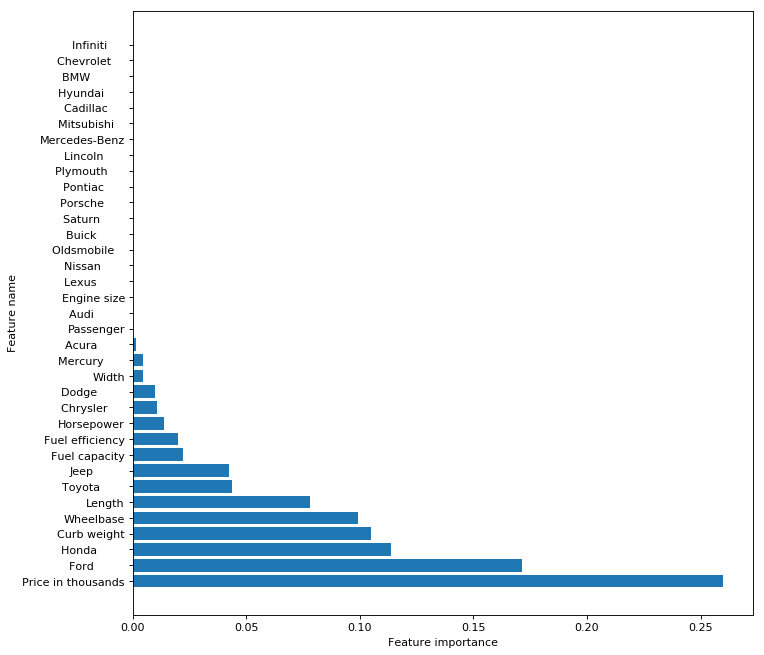

In [19]:
plt.figure(figsize=(10,10), dpi=80)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(dt.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.show()

In [20]:
grid_values = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
               'min_samples_split': [2, 4, 8, 16, 32, 64, 100],\
               'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 100]}
grid_dt_mse = GridSearchCV(dt, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=kf, iid=False)
grid_dt_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_dt_mse.best_params_)
print('Grid best score (MSE): ', grid_dt_mse.best_score_)

Grid best parameter (min. MSE):  {'max_depth': 2, 'min_samples_leaf': 32, 'min_samples_split': 32}
Grid best score (MSE):  -4049.063554275729


In [21]:
dt = grid_dt_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(dt.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(dt.score(X_test, y_test)))

R-squared score (training): 0.094
R-squared score (test): -0.225


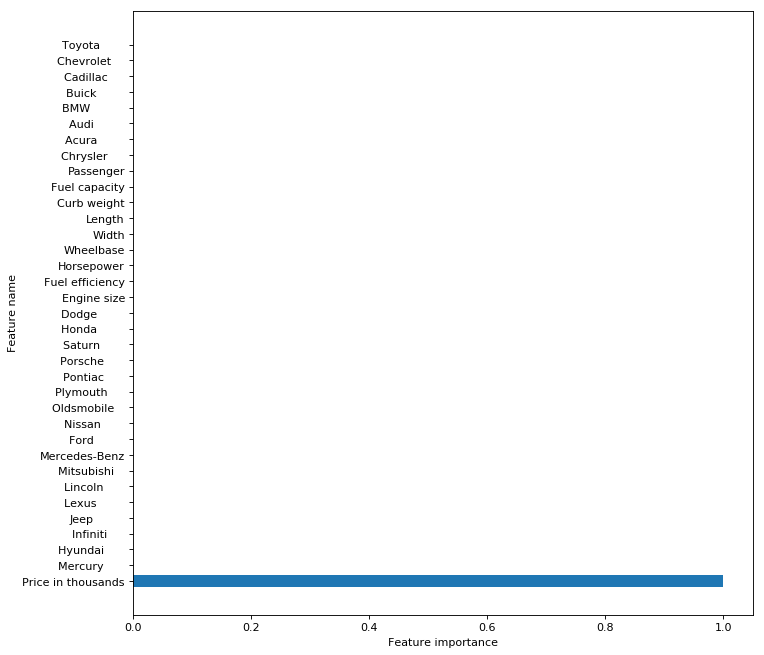

In [22]:
plt.figure(figsize=(10,10), dpi=80)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(dt.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
plt.barh(feature_importance['features'], feature_importance['importance'])
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.show()

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=3).fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(rf.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(rf.score(X_test, y_test)))

R-squared score (training): 0.873
R-squared score (test): 0.232


In [24]:
grid_values = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
               'min_samples_split': [2, 4, 8, 16, 32, 64, 100],\
               'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 100]}
grid_rf_mse = GridSearchCV(rf, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=kf, iid=False, return_train_score=False)
grid_rf_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_rf_mse.best_params_)
print('Grid best score (MSE): ', grid_rf_mse.best_score_)

Grid best parameter (min. MSE):  {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Grid best score (MSE):  -3876.471715336309


In [25]:
rf = grid_rf_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(rf.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(rf.score(X_test, y_test)))

R-squared score (training): 0.442
R-squared score (test): 0.299


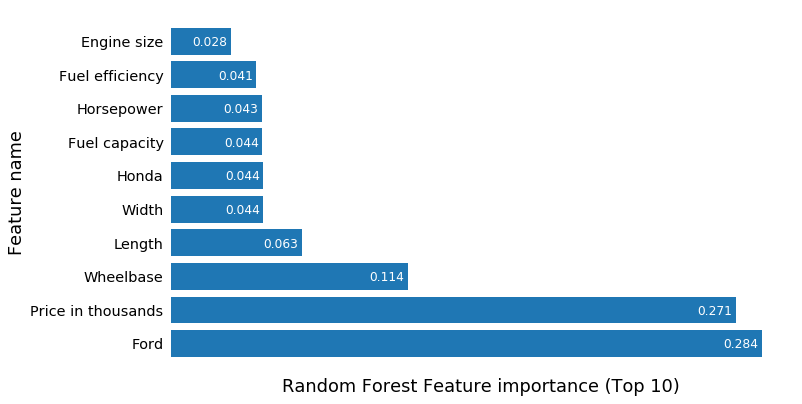

In [26]:
plt.figure(figsize=(10,6), dpi=80)
ax = plt.subplot(111)
feature_names = X_train.columns
feature_importance = pd.DataFrame(feature_names, columns=['features'])
feature_importance['importance'] = pd.DataFrame(rf.feature_importances_)
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance['features'].replace(['Ford         ', 'Honda        ', 'Toyota       '], ['Ford', 'Honda', 'Toyota'], inplace=True)
bars = plt.barh(feature_importance['features'][:10], feature_importance['importance'][:10])
plt.tick_params(left=False, bottom=False, labelbottom=False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    plt.gca().text(bar.get_width() - 0.01, bar.get_y() + bar.get_height()/3, str(round(bar.get_width(),3)), 
                   ha='center', color='white', fontsize=11)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Random Forest Feature importance (Top 10)', fontsize=16)
plt.ylabel('Feature name', fontsize=16)
plt.show()

In [27]:
xg_reg = xgb.XGBRegressor().fit(X_train, y_train)
print('R-squared score (training): {:.3f}'.format(xg_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(xg_reg.score(X_test, y_test)))

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


R-squared score (training): 0.950
R-squared score (test): 0.114


In [28]:
grid_values = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],\
               'min_child_weight': [1, 2, 4, 8, 16, 32, 64, 100]}
grid_xgb_mse = GridSearchCV(xg_reg, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5, iid=False)
grid_xgb_mse.fit(X_train, y_train)

print('Grid best parameter (min. MSE): ', grid_xgb_mse.best_params_)
print('Grid best score (MSE): ', grid_xgb_mse.best_score_)

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\DELL\Anaconda3\l

Grid best parameter (min. MSE):  {'max_depth': 1, 'min_child_weight': 8}
Grid best score (MSE):  -4188.362645947763


C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [29]:
xg_reg = grid_xgb_mse.best_estimator_
print('R-squared score (training): {:.3f}'.format(xg_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(xg_reg.score(X_test, y_test)))

R-squared score (training): 0.445
R-squared score (test): 0.027
